# Ensemble Methods

Ensemble methods are a powerful approach in machine learning that involve combining multiple individual models to improve predictive performance.


The idea behind ensembles is to harness the collective intelligence of diverse models to make more accurate and robust predictions. Two common types of ensemble methods are Bagging and Boosting.

Bagging methods, like Random Forest, build multiple models independently and combine their predictions through averaging or voting, reducing overfitting and enhancing stability.

Boosting methods, such as AdaBoost and Gradient Boosting, sequentially train models, giving more weight to instances that were previously misclassified, resulting in models with superior predictive capabilities.

Ensemble methods have become indispensable in many machine learning applications, consistently delivering state-of-the-art performance across various domains.



## Bagging

Bagging, short for Bootstrap Aggregating, is an ensemble method designed to enhance the predictive performance of machine learning models. It involves building multiple independent models and combining their predictions to reduce variance and improve model stability.

### Bagging Algorithm :

- **Initialization**: Start with the original training dataset.
- **Bootstrap Sampling**: Randomly select subsets of data (with replacement) to create multiple training datasets.
- **Model Training**: Train individual models (e.g., decision trees) on each of these bootstrapped datasets.
- **Prediction Aggregation**: Combine the predictions of these models through averaging or voting for classification tasks.
- **Reduced Variance**: The ensemble's predictions are typically more robust and less prone to overfitting.

### Advantages of Bagging :

- **Reduced Variance**: Bagging reduces the variance of the model, making it less sensitive to noise in the data.
- **Improved Generalization**: Bagging often leads to better generalization performance on unseen data.
- **Simple Implementation**: The concept of bagging is relatively simple to implement, and it works well with various base models.
- **Parallelization**: The independent models in bagging can be trained in parallel, speeding up the training process.

### Disadvantages of Bagging :

- **Limited Bias Reduction**: Bagging mainly reduces variance, and it may not significantly reduce the model's bias.
- **Complexity**: For small datasets, the overhead of creating multiple subsets and models may not be justified.
- **Ensemble Size**: The number of models in the ensemble needs to be carefully chosen to balance performance and computational resources.

## Random Forest

Random Forest is a popular ensemble learning method that builds upon the principles of bagging. It further enhances the performance of decision trees by introducing randomness during both data sampling and feature selection.

### Random Forest Algorithm :

- **Initialization**: Start with the original training dataset.
- **Bootstrap Sampling**: Randomly select subsets of data (with replacement) to create multiple training datasets.
- **Random Feature Selection**: During each tree's construction, randomly select a subset of features for splitting at each node.
- **Model Training**: Train individual decision trees on each of these bootstrapped datasets.
- **Prediction Aggregation**: Combine the predictions of these trees through voting for classification or averaging for regression tasks.

### Advantages of Random Forest :

- **High Performance**: Random Forest is known for its high predictive accuracy and robustness.
- **Reduced Overfitting**: The combination of bagging and feature randomness reduces overfitting.
- **Feature Importance**: Random Forest provides feature importance scores, aiding in feature selection and understanding.
- **Parallelization**: Like bagging, Random Forest can be parallelized for efficient training.

### Disadvantages of Random Forest :

- **Complexity**: Random Forest models can become complex with a large number of trees and features.
- **Less Interpretability**: While Random Forest provides feature importance, the ensemble's decision-making process may be less interpretable than a single decision tree.
- **Slower Inference**: Predictions can be slower due to the aggregation of multiple decision trees.


## Dataset
-For our Ensemble Methods, we will be working with the "Housing Dataset." This dataset contains valuable information about various aspects of houses.

**Dataset Details:**

- **Price**: The price of the houses, categorized into different price ranges.
- **Area**: The area of the houses, also categorized into distinct ranges.
- **Bedrooms**: The number of bedrooms in each house.
- **Bathrooms**: The number of bathrooms in each house.
- **Stories**: The number of stories each house has.
- **Main Road**: A binary variable indicating whether the house is connected to the main road.
- **Guest Room**: A binary variable indicating whether the house has a guest room.
- **Basement**: A binary variable indicating whether the house has a basement.
- **Hot Water Heating**: A binary variable indicating whether the house has a hot water heating system.
- **Air Conditioning**: A binary variable indicating whether the house has an air conditioning system.
- **Parking**: The number of parking spaces available for each house.
- **Prefarea**: A binary variable indicating the preferred area of the house.
- **Furnishing Status**: The furnishing status of the house, categorized as "semi-furnished," "unfurnished," or "other."

**Price and Area Labels:**
- The "Price" column is categorized into different price ranges.
- The "Area" column is categorized into distinct ranges.

These datasets provide valuable insights into the factors affecting house prices and are well-suited for training and evaluating Ensemble Methods.


##Implementation

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
housing_df = pd.read_csv('Housing.csv')

# Preprocessing: Converting categorical variables to numerical
housing_df['mainroad'] = housing_df['mainroad'].map({'yes': 1, 'no': 0})
housing_df['guestroom'] = housing_df['guestroom'].map({'yes': 1, 'no': 0})
housing_df['basement'] = housing_df['basement'].map({'yes': 1, 'no': 0})
housing_df['hotwaterheating'] = housing_df['hotwaterheating'].map({'yes': 1, 'no': 0})
housing_df['airconditioning'] = housing_df['airconditioning'].map({'yes': 1, 'no': 0})
housing_df['prefarea'] = housing_df['prefarea'].map({'yes': 1, 'no': 0})
housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)

# Selecting features and target variable
X = housing_df.drop('price', axis=1)
y = housing_df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging
bagging_reg = BaggingRegressor(DecisionTreeRegressor(random_state=42),
                               n_estimators=100,
                               random_state=42)
bagging_reg.fit(X_train, y_train)

# Random Forest
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Making predictions with the Bagging Regressor
y_pred_bagging = bagging_reg.predict(X_test)

# Evaluating the Bagging Regressor
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f"Bagging Regressor MSE: {mse_bagging}")
print(f"Bagging Regressor R2 Score: {r2_bagging}")

# Making predictions with the Random Forest Regressor
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluating the Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Random Forest Regressor R2 Score: {r2_rf}")

Bagging Regressor MSE: 1840999983006.4016
Bagging Regressor R2 Score: 0.5724958805691238
Random Forest Regressor MSE: 1851447495677.3132
Random Forest Regressor R2 Score: 0.5700698323638831


## Interpretation of Results

We have evaluated the performance of two regression models, the Bagging Regressor and the Random Forest Regressor, on our dataset. Here are the results:

### Bagging Regressor

- **MSE (Mean Squared Error)**: The Bagging Regressor achieved an MSE of approximately 1,840,999,983,006.40. This metric quantifies the average squared difference between predicted and actual values, and a lower MSE indicates better model accuracy.

- **R2 Score (Coefficient of Determination)**: The R2 Score for the Bagging Regressor is approximately 0.5725. This score represents the proportion of the variance in the target variable that is explained by the model. An R2 score closer to 1 indicates a better fit to the data, so the Bagging Regressor's performance suggests a moderate level of predictive accuracy.

### Random Forest Regressor

- **MSE (Mean Squared Error)**: The Random Forest Regressor yielded an MSE of approximately 1,851,447,495,677.31. This metric evaluates the model's prediction accuracy, with a lower MSE indicating better performance.

- **R2 Score (Coefficient of Determination)**: The R2 Score for the Random Forest Regressor is approximately 0.5701. This score reflects how well the model explains the variance in the target variable. The Random Forest Regressor's R2 score suggests a similar level of predictive accuracy to the Bagging Regressor.

In summary, both the Bagging Regressor and the Random Forest Regressor have demonstrated moderate predictive performance. While the MSE values indicate that there is room for improvement in reducing prediction errors, the R2 scores suggest that the models explain a reasonable portion of the variance in the target variable. Further tuning and feature engineering may enhance the models' predictive capabilities.


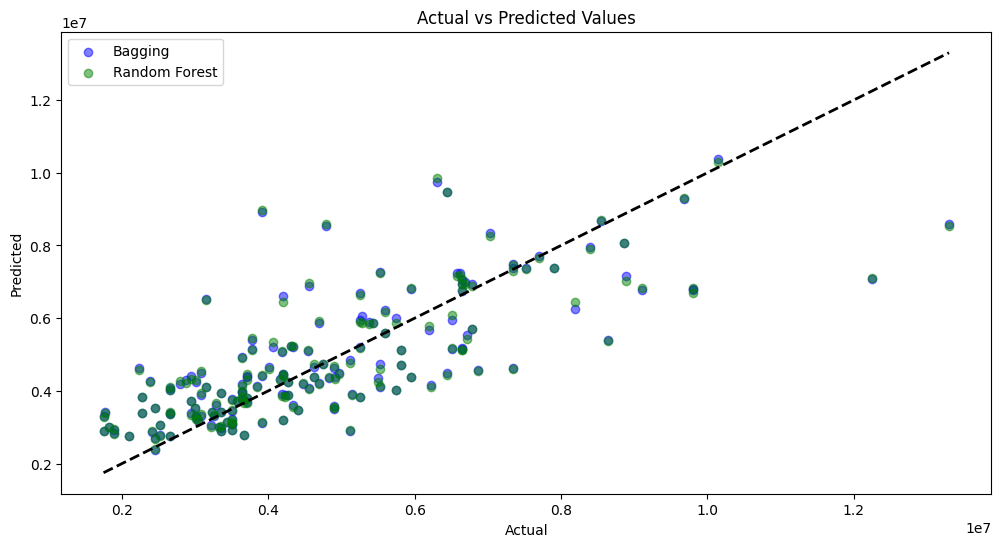

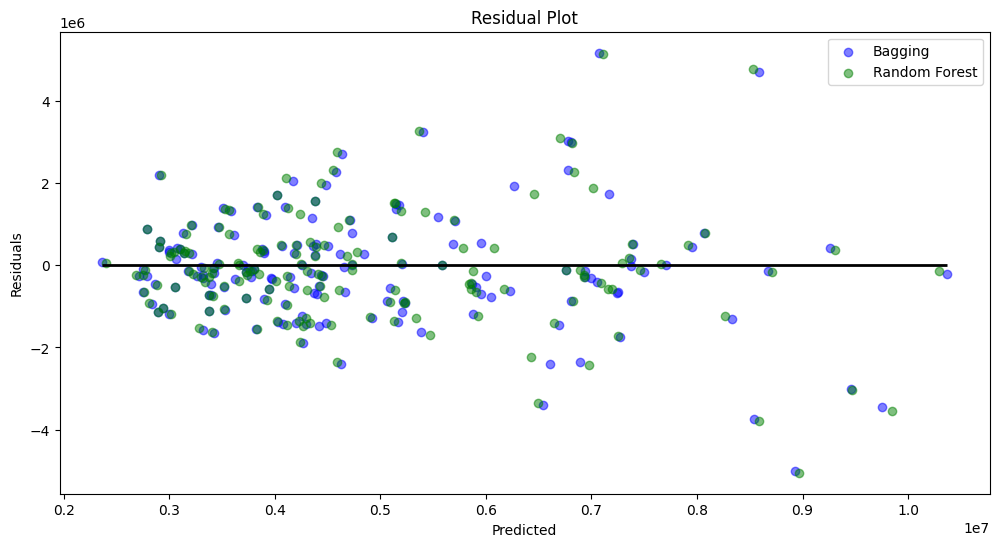

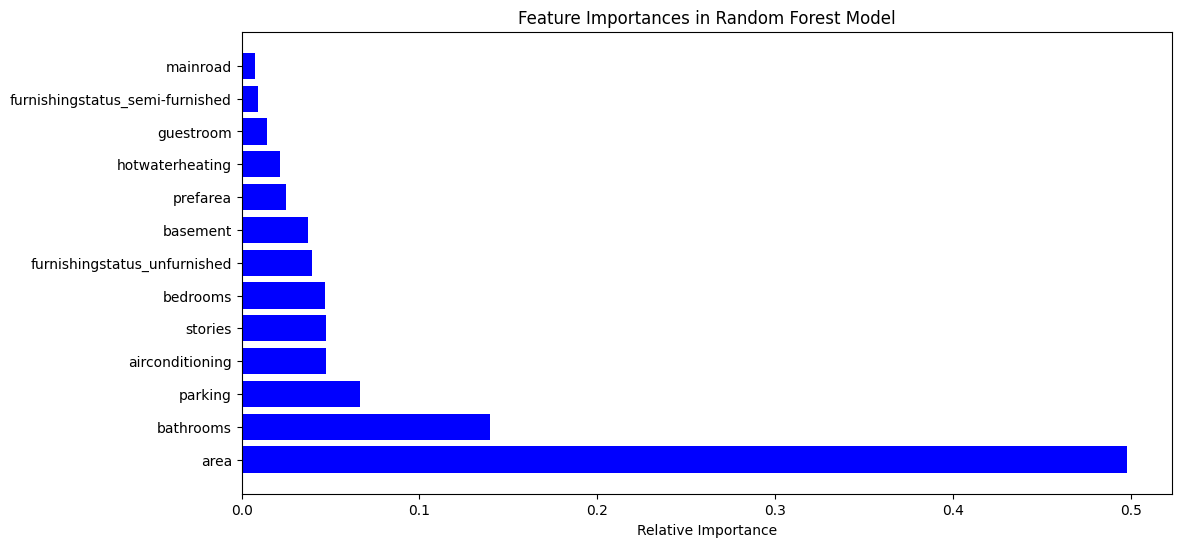

In [5]:
import numpy as np
# Performance Visualization: Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_bagging, alpha=0.5, label='Bagging', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Error Analysis: Residual Plot
residual_bagging = y_test - y_pred_bagging
residual_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_bagging, residual_bagging, alpha=0.5, label='Bagging', color='blue')
plt.scatter(y_pred_rf, residual_rf, alpha=0.5, label='Random Forest', color='green')
plt.hlines(y=0, xmin=y_pred_bagging.min(), xmax=y_pred_bagging.max(), color='black', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

# Feature Importance for Random Forest
feature_importances = random_forest_reg.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Actual vs Predicted Values Plot

The scatter plot comparing the actual and predicted values for Bagging and Random Forest models provides insight into the performance of the models.

The dashed line represents the ideal scenario where predicted values perfectly match the actual values. Points closer to this line indicate more accurate predictions.

The overlapping of points from both Bagging (in blue) and Random Forest (in green) suggests that their performance is quite similar, although Random Forest appears to have a slightly tighter cluster along the ideal line, indicating a higher accuracy in predictions.

### Residual Plot

The residual plot displays the difference between the actual and predicted values. The horizontal line at zero represents no error. Points above the line indicate overestimation, while points below signify underestimation by the models.

Both models exhibit a random pattern of residuals, indicating that the models' assumptions about the homoscedasticity of errors might hold true.

However, some outliers are noticeable, and Random Forest seems to have fewer outliers compared to Bagging, which may point to its better performance in handling extreme cases.

### Feature Importances in Random Forest Model

The bar chart illustrates the feature importances derived from the Random Forest model. The 'area' feature dominates, showing the most significant influence on housing prices. Other important features include 'bathrooms' and 'parking', while 'mainroad' has the least influence.

This suggests that while location size and amenities significantly affect housing prices, the presence of a main road is less critical.
